In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#importing the dataset
df = pd.read_csv("shootings.csv",index_col="name")

In [3]:
#overview info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4895 entries, Tim Elliot to Nicholas Hirsh
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       4895 non-null   int64  
 1   date                     4895 non-null   object 
 2   manner_of_death          4895 non-null   object 
 3   armed                    4895 non-null   object 
 4   age                      4895 non-null   float64
 5   gender                   4895 non-null   object 
 6   race                     4895 non-null   object 
 7   city                     4895 non-null   object 
 8   state                    4895 non-null   object 
 9   signs_of_mental_illness  4895 non-null   bool   
 10  threat_level             4895 non-null   object 
 11  flee                     4895 non-null   object 
 12  body_camera              4895 non-null   bool   
 13  arms_category            4895 non-null   object 
dtypes: bool(2)

In [4]:
df.head()

,id,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
name,,,,,,,,,,,,,,
Tim Elliot,3,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
Lewis Lee Lembke,4,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
John Paul Quintero,5,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
Matthew Hoffman,8,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
Michael Rodriguez,9,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [5]:
#check for missing data
df.isna().mean()

id                         0.0
date                       0.0
manner_of_death            0.0
armed                      0.0
age                        0.0
gender                     0.0
race                       0.0
city                       0.0
state                      0.0
signs_of_mental_illness    0.0
threat_level               0.0
flee                       0.0
body_camera                0.0
arms_category              0.0
dtype: float64

In [6]:
#converting to datetime object
date = pd.to_datetime(df['date'].sort_values(axis=0,ascending=True),format="%y%m%d",errors="ignore")
date = np.array(date)

In [7]:
#unique dates and number of kills per each day
uniques = []
count_val = []
for elem in date:
    if elem not in uniques:
        uniques.append(elem)
        count_val.append(1)
    else:
        count_val[-1]+=1

In [8]:
#converting to numpy
dates = np.array(uniques)
kills_per_day = np.array(count_val)

In [9]:
print(f" total number of kills : {kills_per_day.sum()}")
print(f""" From {date.min()} to {date.max()}, approximately {kills_per_day.mean().round()}
 people are shot by the U.S Police Each day""")

 total number of kills : 4895
 From 2015-01-02 to 2020-06-15, approximately 3.0
 people are shot by the U.S Police Each day


Text(0.5, 0, 'days')

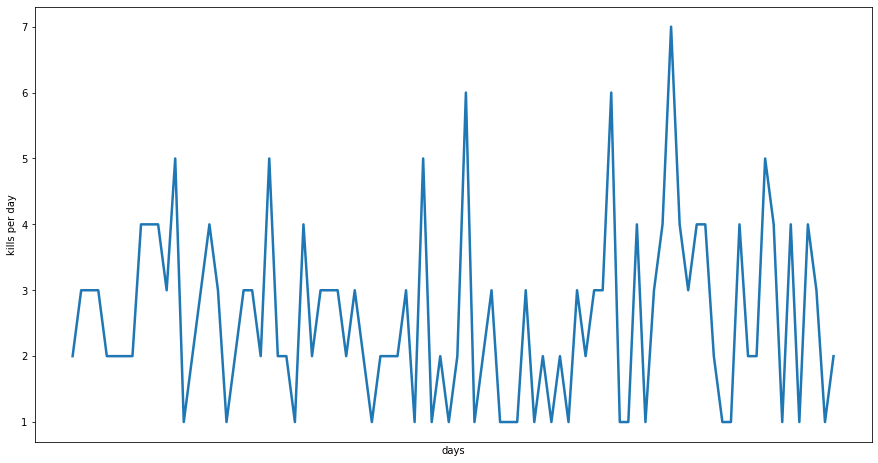

In [10]:
#plotting kills per day
plt.figure(figsize=(15,8))
plt.plot(dates[::20],kills_per_day[::20],linewidth='2.5')
plt.ylabel("kills per day")
ax = plt.gca()
ax.axes.get_xaxis().set_ticks([])
plt.xlabel("days")

In [11]:
#dropping unnecessary data
df.drop(['id'],axis=1,inplace=True)

In [12]:
df.head()

,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
name,,,,,,,,,,,,,
Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


<h2> Check for Racial , Gender or any other form of Bias </h2>

In [13]:
#victim's gender analysis
print("percentage of unarmed male victims : ",100*df[(df['gender']=='M') & (df['armed'] == 'unarmed')].shape[0]/(df[(df['gender']=='M') & (df['armed'] == 'unarmed')].shape[0] + df[(df['gender']=='M') & (df['armed'] != 'unarmed')].shape[0]),"%")
print("percentage of unarmed female victims : ",100*df[(df['gender']=='F') & (df['armed'] == 'unarmed')].shape[0]/(df[(df['gender']=='F') & (df['armed'] == 'unarmed')].shape[0] + df[(df['gender']=='F') & (df['armed'] != 'unarmed')].shape[0]),"%")

percentage of unarmed male victims :  6.912047934945432 %
percentage of unarmed female victims :  11.26126126126126 %


<BarContainer object of 2 artists>

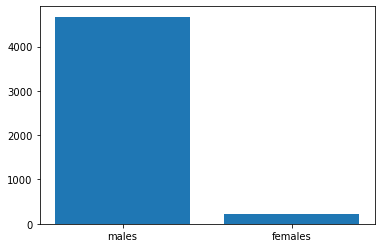

In [14]:
plt.bar(['males','females'],df['gender'].value_counts())

The density of the plot is significantly higher in the range of 30-40 than the other parts of the plot


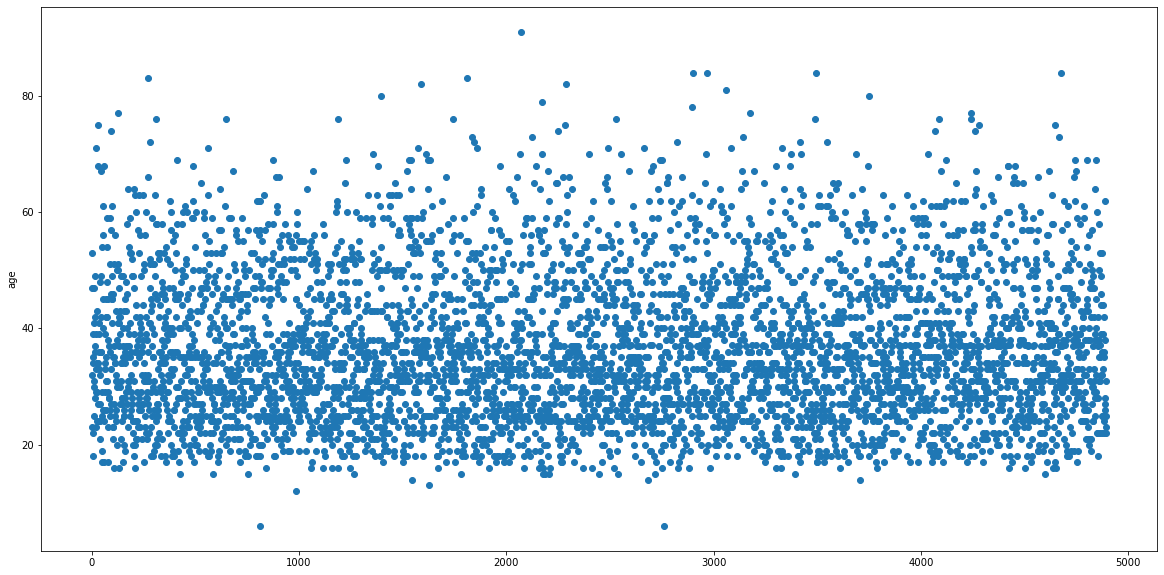

In [15]:
#victim's age analysis
plt.figure(figsize=(20,10))
plt.scatter(np.arange(df.shape[0]),np.array(df['age']))
plt.ylabel("age")
print("The density of the plot is significantly higher in the range of 30-40 than the other parts of the plot")

In [16]:
df['age'].describe()

count    4895.000000
mean       36.549750
std        12.694348
min         6.000000
25%        27.000000
50%        35.000000
75%        45.000000
max        91.000000
Name: age, dtype: float64

<h2> Moving Average</h2>

In [17]:
from sklearn.linear_model import LinearRegression
x = np.arange(kills_per_day[:].reshape(-1,128).mean(axis=1).shape[0])
y = kills_per_day[:].reshape(-1,128).mean(axis=1)
model = LinearRegression()
model.fit(x.reshape(-1,1),y)

LinearRegression()

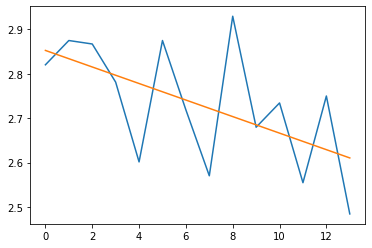

In [18]:
plt.plot(np.arange(kills_per_day[:].reshape(-1,128).mean(axis=1).shape[0]),kills_per_day[:].reshape(-1,128).mean(axis=1))
plt.plot(np.arange(14),model.predict(x.reshape(-1,1)))

In [19]:
print(f"Number of shootings per day in us has decreased but with a variance of {kills_per_day[:].reshape(-1,128).mean(axis=1).std()} which shows the instability in this reduction")

Number of shootings per day in us has decreased but with a variance of 0.13299643063639596 which shows the instability in this reduction
